# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [1]:
# --- Import the required modules / libraries:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
# --- Import the CSV file data into a panda dataframe:
colours_df = pd.read_csv("data/colors.csv")

# --- Set pandas to show only two digits after the decimal:
pd.options.display.float_format = '{:,.2f}'.format

#colours_df.head()

In [ ]:
# --- Find out how many unique values are in each column in the dataframe.
# --- Note: axis= index column to use:
colours_df.nunique(axis=0)

In [ ]:
colours_df.count()

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [ ]:
colours_df.groupby('is_trans').count()

In [ ]:
colours_df["is_trans"].value_counts()

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

<img src="https://i.imgur.com/whB1olq.png ">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [3]:
sets_df = pd.read_csv("data/sets.csv")

In [14]:
sets_df.head(n=2)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12


In [ ]:
sets_df.tail(n=2)

**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [15]:
sets_df.sort_values("year", ascending = True).head(n=1)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [ ]:
# sets_df.groupby(by="year").count().head(n=1)
sets_df[sets_df["year"] == 1949]

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [ ]:
sets_df.sort_values("num_parts", ascending = False).head(n=5)

**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [13]:
sets_by_year = sets_df.groupby(by="year").count()

In [ ]:
sets_by_year.tail(n=5)

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(sets_by_year.index, sets_by_year.set_num)
plt.xlabel("Year", fontsize=14)
plt.ylabel("No. of Sets", fontsize=14)
# Change the label from "name" to "Number of sets":
plt.legend(["Number of sets"], fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.suptitle("Lego Sets By Year", fontsize=14)

In [ ]:
# --- Remove 2020 and 2021 ([:-2])
plt.figure(figsize=(8,6))
# --- Remove 2020 and 2021 by slicing the last two entries [:-2]
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])
plt.xlabel("Year", fontsize=14)
plt.ylabel("No. of Sets", fontsize=14)
# Change the label from "name" to "Number of sets":
plt.legend(["Number of sets"], fancybox=True, framealpha=True, shadow=True, borderpad=1)
plt.suptitle("Lego Sets By Year", fontsize=14)

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [5]:
# --- Create a new dataframe that groups by year and aggregates all of the unique theme_id's used in each year:
themes_by_year_df = sets_df.groupby("year").agg({"theme_id": pd.Series.nunique})
#themes_by_year_df.head()

In [ ]:
# --- Change the title of the "theme_id" column to "no_of_themes":
themes_by_year_df.rename(columns={"theme_id":"no_of_themes"}, inplace=True)
themes_by_year_df.head()

**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

In [ ]:
plt.figure(figsize=(8,6))
# --- Remove 2020 and 2021 by slicing the last two entries [:-2]
plt.plot(themes_by_year_df.index[:-2], themes_by_year_df.no_of_themes[:-2])
plt.xlabel("Year", fontsize=14)
plt.ylabel("No. of Themes", fontsize=14)
# Change the label from "name" to "Number of sets":
plt.legend(["Number of Themes"], fancybox=True, framealpha=True, shadow=True, borderpad=1)
plt.suptitle("Lego Set Themes Per Year", fontsize=14)

### Line Charts with Two Seperate Axes

In [ ]:
# --- Create a figure:
plt.figure(figsize=(14,8))
plt.grid()

# --- Plot twin y-axis'
ax_y_1 = plt.gca()
ax_y_2 = plt.twinx()

# --- Set the graphs title:
ax_y_1.set_title("Lego Set Themes and Sets Per Year", fontsize=16)

# --- Get the data for the first y-axis:
lns1 = ax_y_1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color="red", label = "No. of Set")
ax_y_1.set_ylabel("No. of Sets", fontsize=16)
ax_y_1.set_xlabel("Year", fontsize=16)

# --- Get the data for the second y-axis:
lns2 = ax_y_2.plot(themes_by_year_df.index[:-2], themes_by_year_df.no_of_themes[:-2], color="green", label = "No. of Themes")
ax_y_2.set_ylabel("No. of Themes", fontsize=16)

# --- Create the legend:
leg = lns1 + lns2
labs = [l.get_label() for l in leg]

ax_y_1.legend(leg, labs, loc=0)

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [ ]:
parts_per_set = sets_df.groupby("year").agg({"num_parts": pd.Series.mean})
parts_per_set

In [ ]:
parts_per_set.tail()

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

In [ ]:
# --- Setup the chart layout:
plt.figure(figsize=(14,8))
plt.grid()
plt.xlabel("Year", fontsize=14)
plt.ylabel("Avg No. Of Parts", fontsize=14)
plt.ylim(0, 300)
plt.suptitle("Avg No. Of Parts 2008 - 2020", fontsize=14)
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2], label="No. Of Parts")

# --- Add the legend:
plt.legend(fontsize=14, loc='upper left', fancybox=True, shadow=True)

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

![Schema](assets/rebrickable_schema.png "Schema")

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [ ]:
# --- Gather the list of Lego themes based on Star Wars:
themes_df = pd.read_csv("data/themes.csv")

In [ ]:
themes_df[themes_df["name"] == "Star Wars"]

In [ ]:
# --- Return a list of sets based on id 18 from the themes_df:
sets_df[sets_df["theme_id"] == 18]

In [ ]:
# --- Return a list of sets based on id 209 from the themes_df:
sets_df[sets_df["theme_id"] == 209]

In [ ]:
set_theme_count = sets_df["theme_id"].value_counts()
# set_theme_count.head()

### Merging (i.e., Combining) DataFrames based on a Key


In [ ]:
# --- Create a new dataframe from set_theme_count to have column names:
set_theme_count_df = pd.DataFrame({"id": set_theme_count.index,
                                   "set_count": set_theme_count.values})
# set_theme_count_df.head()

In [ ]:
# --- Merge the two set_theme_count_df and themes_df where each has a column for id:
merged_df = pd.merge(set_theme_count_df, themes_df, on='id')
# merged_df.head()

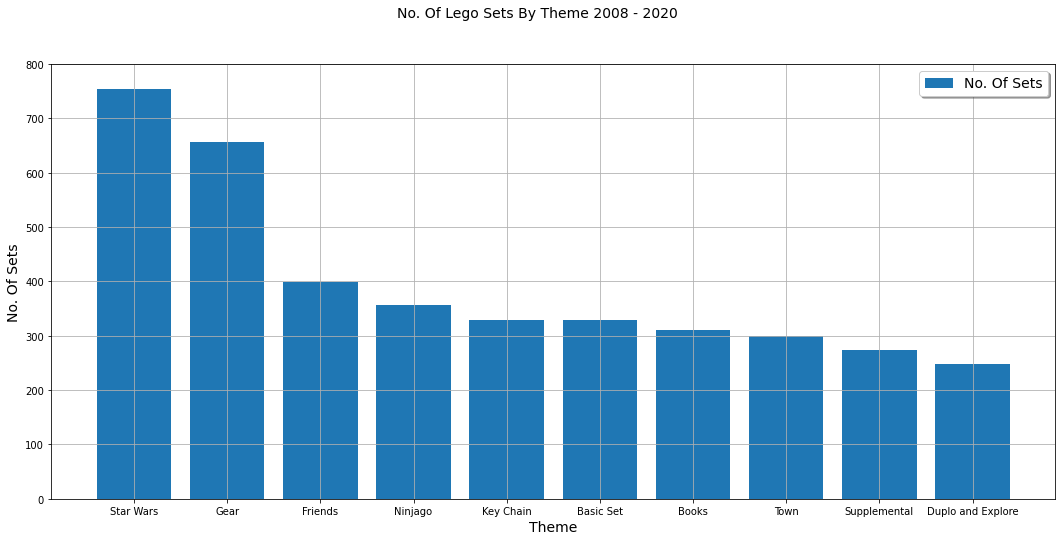

In [69]:
# --- Setup the chart layout:
plt.figure(figsize=(18,8))
plt.grid()
plt.xlabel("Theme", fontsize=14)
plt.ylabel("No. Of Sets", fontsize=14)
plt.ylim(0,800)
plt.suptitle("No. Of Lego Sets By Theme 2008 - 2020", fontsize=14)
plt.bar(merged_df["name"][:10], merged_df["set_count"][:10], label="No. Of Sets")

# --- Add the legend:
plt.legend(fontsize=14, loc='upper right', fancybox=True, shadow=True)